In [14]:
#Implementing Random Forest Regression in Python

#1 Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [ ]:
#2 Importing Dataset

In [15]:
df= pd.read_csv('C:/Users/Mola/Documents/Python/Position_Salaries.csv')

print(df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [17]:
#3 Data Preparation
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values


In [18]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [8]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

#4 Random Forest Regressor Model
The code processes categorical data by encoding it numerically, combines the processed data with numerical data and trains a Random Forest Regression model using the prepared data.

RandomForestRegressor: It builds multiple decision trees and combines their predictions.
n_estimators=10: Defines the number of decision trees in the Random Forest.
random_state=0: Ensures the randomness in model training is controlled for reproducibility.
oob_score=True: Enables out-of-bag scoring which evaluates the model's performance using data not seen by individual trees during training.
LabelEncoder(): Converts categorical variables (object type) into numerical values, making them suitable for machine learning models.
apply(label_encoder.fit_transform): Applies the LabelEncoder transformation to each categorical column, converting string labels into numbers.
concat(): Combines the numerical and encoded categorical features horizontally into one dataset which is then used as input for the model.

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(x, y)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [23]:
#5 Making Predictions and Evaluating
from sklearn.metrics import mean_squared_error, r2_score

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(x,y)
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(x)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: 0.644879832593859
Mean Squared Error: 2647325000.0
R-squared: 0.9671801245316117


# 6 Visualizing
Now let's visualize the results obtained by using the RandomForest Regression model on our salaries dataset.

Creates a grid of prediction points covering the range of the feature values.
Plots the real data points as blue scatter points.
Plots the predicted values for the prediction grid as a green line.
Adds labels and a title to the plot for better understanding.


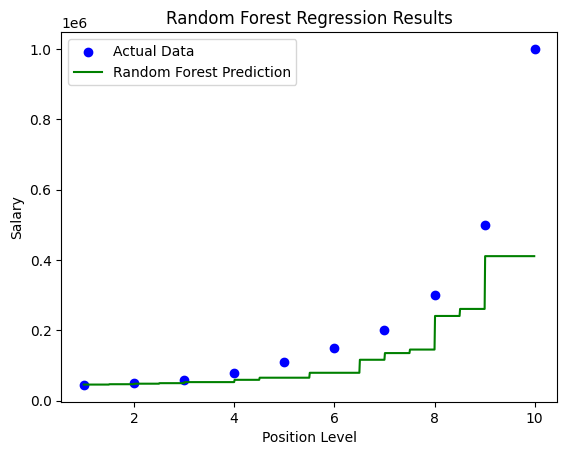

In [21]:
import numpy as np
   
X_grid = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01)  # Only the first feature
X_grid = X_grid.reshape(-1, 1)
X_grid = np.hstack((X_grid, np.zeros((X_grid.shape[0], 2))))  # Pad with zeros

plt.scatter(X[:, 0], y, color='blue', label="Actual Data")
plt.plot(X_grid[:, 0], regressor.predict(X_grid), color='green', label="Random Forest Prediction")  
plt.title("Random Forest Regression Results")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

7. Visualizing a Single Decision Tree from the Random Forest Model
The code visualizes one of the decision trees from the trained Random Forest model. Plots the selected decision tree, displaying the decision-making process of a single tree within the ensemble.

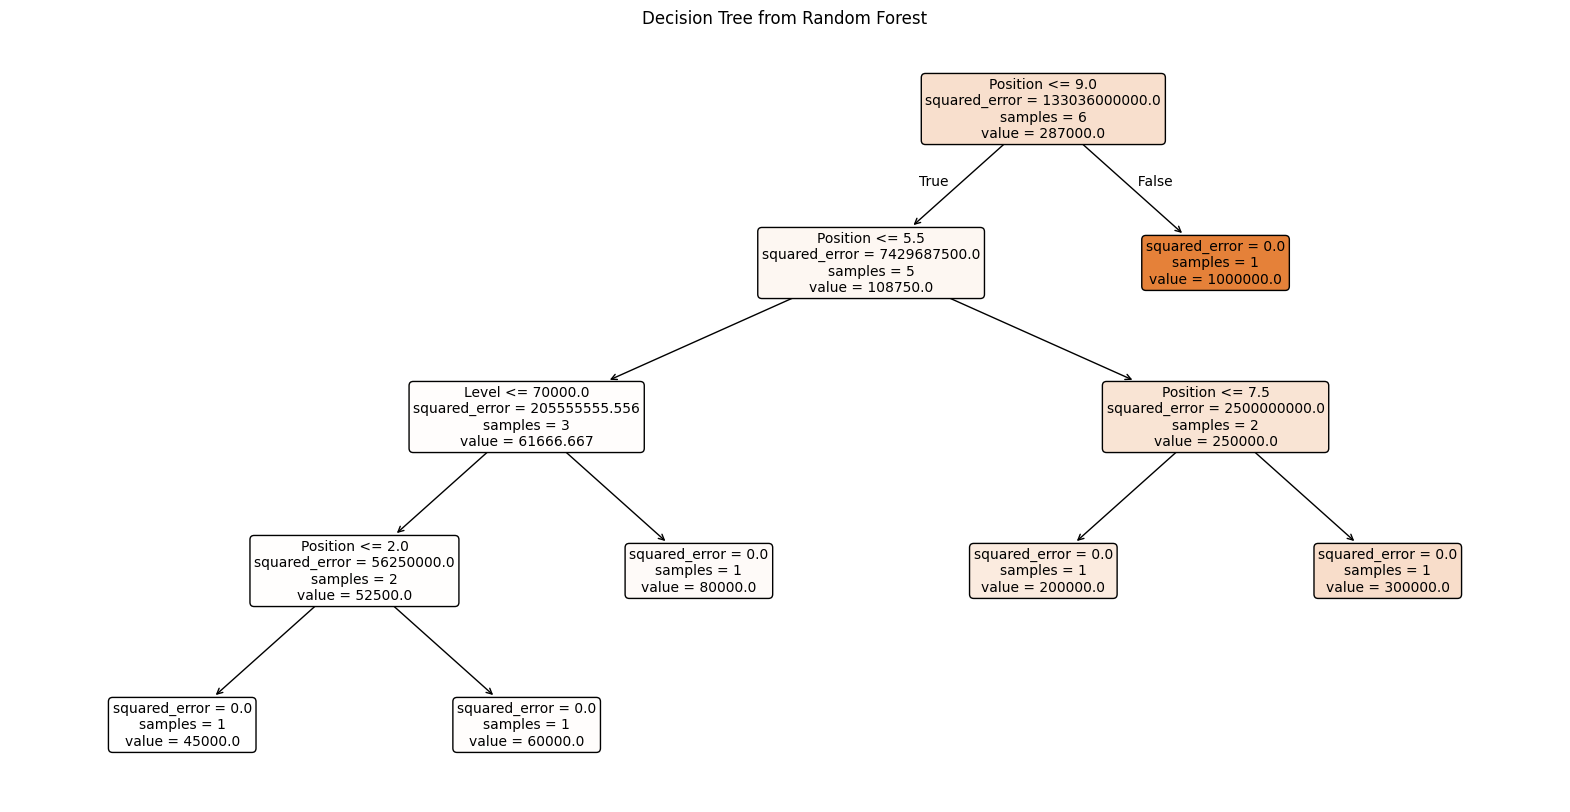

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_to_plot = regressor.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()